# Probabilistic Linear Discriminant Analysis

PLDA is supervised learning. In PLDA assumes that the training data can be generated by known process (given by equation). Therfore it is called a generative model because of that. The PLDA instead of work with distances as measures of similarity, it provides probabilities as measure of similarity. Like in  <a href="intro_lda.ipynb">Fisher LDA</a>, PLDA transform the training data into a new subspace where the discriminativy power is maximized. Below are the main assumpiosn:

1. Normal distribution
    * All classes are normal distributed: $P(x \mid y) = N(x \mid y,\Phi_w)$
    * All class has the same covariance matrix $\Phi_w$ 
    * The centroides of each class are normal distributed: $P(y) = N(y|m,\Phi_b)$. Therefore, PLDA can be extended to unknown classes.
3. Each class has the same number of samples $n_k$ (For analytic soltuion, but not for EM solution). Case it is not true, resample the class in order to have all class with the same number of observations or set $n_k$ with average number of sample per class

The solution has the constraints:
1. $\Phi_w$ is positive defined
2. The priori $P(y) = N(y \mid 0,\Phi_b)$ is normal distributed
3. $\Phi_b$ is semi-positive defined

See this wiki: [this](https://en.wikipedia.org/wiki/Positive-definite_matrix)

Motivations:

refs: https://ravisoji.com/assets/papers/Ioffe2006PLDA.pdf (abstract)

1. Fisher LDA is common used in object recognition for feature extraction, but do not address the problem of how to use these features for recognition.
2. The latent variables of PLDA (PLDA components) represent both: the class of the object and the within variability class of the object.
3. Automatic give more weight of the features with the most discriminativy power
4. Can build a model of unseen class with only one example or can combine multiple examples for a better representation of the class

Application:


It is commonly used in biometric authentication and PLDA models perform well in face and speaker recognition

* Speaker recognition
* Face recogintion

For simplicity, the practical aspect of PLDA will be explained utilzing 3 classes example and bi-dimensional data.

###  How PLDA works

The dataset is a set of $N$ d-dimensional samples $X = \{x_1, x_2, ..., x_N\}$ already labeled in 2 groups: 
$X^{(k)} = \{ x_1^{(k)},  x_2^{(k)}, ..., x_{n_k}^{(k)} \}$ of size $n_k$ for $k = 1,2, ..., K$ where $x_i^{(k)}$ is a vector of dimension $d$ and it means the ith sample of the kth class.

The figure below, a labeled dataset ($x_i^{(k)}$) contained 3 classes are shown.  The centroides of each class $y = m_k$ are the red points and the global mean is in blue.

<img src="../images/plda_0.png" width="300"/>

The linear transformation $x' = W^t x$ map $x_i^{(k)}$ in to new set of axis defined by the new subsace $U$ where all class follows standart multivariate normal distribution. And the centroides follows a multivariate normal distribution where the covariance matrix is decorrelated. See the figute below, where the transformed $x_i^{(k)}$ is presented in $U$ subsapce.

<img src="../images/plda_1.png" width="300"/>

In the figure above, the vertical axis is the axis with the most discriminative power and the horizontal axis can be discarded. PLDA assumes that the training data is generated by:

$
x = m + Au
$

and the centroids by

$
y = m + Av
$

The subspace defined by $U$ maximize the discriminative power. In order to do that, PLDA like Fisher LDA maximize the ratio "scatter between classes/scatter within classes" 
expressed by the cost function $J(w)$. The problem can be transformed in the generalized eigenvector eigenvalue problem which the solutions are known.

$
S_b w =  \lambda S_w w
$

where:

* $S_b= \frac{1}{N} \sum_{k=1}^K n_k (m_k - m)( m_k - m)^t$ :  between-class covariance/satter matrix. (Can be understood as measure of between class spread)
    
* $S_{w} = \frac{1}{N} \sum_{k=1}^K S_k$ : within-class covariance/scatter matrices. (Can be understood as measure of within class spread or the sum of the spread matrix of each class) 


---
**NOTE**

The difference of this equations and the ones in Fisher's LDA are just the normalization constant $\frac{1}{N}$. See the notebook <a href="intro_lda.ipynb">intro to Fishers LDA</a>. 

$S_t$ is the total spread matrix: $S_t = S_w + S_b$  
---


$ m_k$ is the mean of each class. $m$ is the global mean. and $S_k$ is the spread matrix of each class given by:

$
S_k = \sum_{x_i\in X^{(k)}} ( x_i^{(k)} -  m_k) ( x_i^{(k)} - m_k)^t  
$

The covariance matrix of each class can be estimated (becomes better as $n_k >> 1$) using the spread matrix:

$
\hat{\Phi_w} = \frac{1}{n_k -1}S_k  
$

And the cost function:

$
J(w) = \frac{w^t S_{b} w}{ w^t S_{w}  w} 
$

To find a solution to PLDA, we need to determine the 3 learning parameters: $A$ (transform $x$ and $y$), $m$ and $\Psi$. It is not the scope of this "personal note" to demonstrade that, but the solutions can be given by:


$
A  = W^{-t} \left ( \frac{n}{n-1} \Lambda_w \right)^{\frac{1}{2}}
$

$
\Psi = max(0, \frac{n-1}{n} (\Lambda_b/\Lambda_w) - \frac{1}{n})
$

Where: 

$W$ is a matrix with the column eigenvector stacked that solves the eigenvector egeinvalue generalized problem.

$\boldsymbol W = \begin{bmatrix}
 w_1 & w_2 & \cdots & w_k
\end{bmatrix} 
$


The diagonalized spread matrixes:  

$
\Lambda_b = W^t S_b W
$

$
\Lambda_w = W^t S_w W
$


Other importants formulas of this solutions are:


$
\Phi_w = AA^t
$

and 

$
\Phi_b = A \Psi A^t
$

---
**NOTE**

PLDA impose that $\Phi_w$ is positive defined. So when solve the eigenvecto problem above we need to impose that as well. But I ma not completely sure about that. 

```python
from scipy.linalg import eigh

eigenvalues, W = eigh(Sb, Sw)

## Doc: eigh(S, b=None, lower=True, eigvals_only=False, overwrite_a=False, overwrite_b=False, turbo=True, eigvals=None, type=1, check_finite=True)
## Solve an ordinary or generalized eigenvalue problem for a complex Hermitian or real symmetric matrix.

Find eigenvalues w and optionally eigenvectors v of matrix a, where b is positive definite:
```  
---



=============================

Transforms an X into a space where the within-class variance is unit and between-class variance is diagonalized.

The probability of not belonging to any known class is: 

P(u_new| 0) = N(u_new| 0, \Psi + I)

$\boldsymbol W = \begin{bmatrix}
 w_1 & w_2 & \cdots & w_k
\end{bmatrix} 
$

### Summarizing the PLDA approach in 5 steps

1. Define $n = N/k$
2. Compute the transformations matrixes
    * Compute the spread matrixes
    * Determine $W$ by solving the $S_b w = \lambda S_w w $
    * Compute the diagonalized spread matrixes $\Lambda_w$ and $\Lambda_b$
2. Compute the learning parameters 
    * $m = \frac{1}{N}\sum_i^N x_i $
    * $ A  = W^{-t} \left ( \frac{n}{n-1} \Lambda_w \right)^{\frac{1}{2}} $
    * $ \Psi = max(0, \frac{n-1}{n} (\Lambda_b/\Lambda_w) - \frac{1}{n})  $
3. Reduce dimensionality to $d' < d$
    * keep the $d'$ largest elements of $\Psi$ and set the rest to zero. 
    * kewp only the features correspondent to non-zero elements of $\Psi$ in the latent subsapce $u = A^{-1} (x - m)$



In [1]:
import numpy as np
from scipy.linalg import eigh

import pandas as pd
import random as rand
import math
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

from scipy.stats import multivariate_normal

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [4]:
import sys
#sys.path.append('/Users/leandro/Documents/leandro/lda/refs/plda')
sys.path.append('/home/leandroohf/Documents/leandro/LDA/refs/plda/')


import plda

In [ ]:
/home/leandroohf/Documents/leandro/LDA/refs/plda/

load data

In [5]:
def cov_ellipse(cov, q=None, nsig=None, **kwargs):
    """ Code is slightly modified, but essentially borrowed from: 
         https://stackoverflow.com/questions/18764814/make-contour-of-scatter
    """
    if q is not None:
        q = np.asarray(q)
    elif nsig is not None:
        q = 2 * norm.cdf(nsig) - 1
    else:
        raise ValueError('Either `q` or `nsig` should be specified')

    r2 = chi2.ppf(q, 2)
    val, vec = np.linalg.eigh(cov)
    width, height = 2 * np.sqrt(val[:, None] * r2)
    rotation = np.degrees(np.arctan2(*vec[::-1, 0]))

    return width, height, rotation

def plot_scatter(ax, x, y, s=5, c='black', label='', plot_training_cov=False,
                 model=None):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    if plot_training_cov is True:
        assert model is not None
    
    ax.scatter(x, y, c=c, s=s, label=label)

    if plot_training_cov is True:
        cov = model.data[label]['cov']
        mean_x, mean_y = model.data[label]['mean']
        w, h, deg = cov_ellipse(cov, nsig=2)
        ell = Ellipse(xy=(mean_x, mean_y),
                      width=w, height=h,
                      angle=deg, linewidth=2)
        ell.set_facecolor('none')
        ell.set_edgecolor('black')
        ax.add_patch(ell)
    ax.set_aspect('equal')

    return ax

In [6]:
from numpy.random import multivariate_normal as m_normal

def gen_training_set(n_gaussians, sample_size, n_dims):
    cov = np.random.randint(-10, 10, (n_dims, n_dims))
    cov = np.matmul(cov, cov.T) + np.eye(n_dims) * np.random.rand(n_dims)

    pts = np.vstack([m_normal(np.ones(n_dims) * np.random.randint(-100, 100, 1),
                              cov, sample_size) \
                     for x in range(n_gaussians)])
    lbls = np.hstack([['gaussian_{}'.format(x)] * sample_size for x in range(n_gaussians)])

    return pts, lbls

n_gaussians = 5
sample_size = 100
n_dims = 2
n_test = 5000

# Initialize training and test data.
np.random.seed(0)
train_X, train_Y = gen_training_set(n_gaussians, sample_size, n_dims)

margin = np.sqrt(np.cov(train_X.T).diagonal().sum()) * .1
(min_x, min_y), (max_x, max_y) = np.min(train_X, axis=0) - margin,\
                                 np.max(train_X, axis=0) + margin

test = np.asarray([np.random.uniform(min_x, max_x, n_test),
                   np.random.uniform(min_y, max_y, n_test)]).T

In [7]:
train_X.shape

(500, 2)

In [8]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(train_Y)

labels = le.transform(train_Y)

LabelEncoder()

array([0, 1, 2, 3, 4])

(500, 3)

array([0, 1, 2, 3, 4])

500

100

,x,y,label
137,56.035261,45.631105,1
405,67.634618,82.902492,4
162,58.644108,39.555890,1
151,52.716556,51.841558,1
250,37.801160,37.562159,2


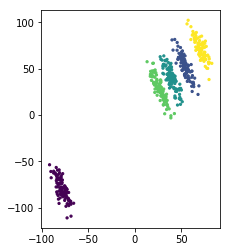

In [9]:
#%run ../simulated_plda_data.ipynb

df = pd.DataFrame(data=train_X, index=None, columns=['x','y'])

df['label'] = labels

df.label.unique()


df.shape

x_new = np.array([-50.0,-50.0])


X = df[['x','y']].values
N = X.shape[0]
y = df.label

df.label.unique()

X1 = df.loc[df.label ==1,['x','y']].values
nk = X1.shape[0]

N
nk

df.sample(5).head(5)

ax = plt.gca()
plot_scatter(ax, train_X[:,0], train_X[:,1], s=5, c=labels, label=labels )

In [10]:
def estimate_gaussian_parameters(Xk):

    mk = np.mean(Xk,axis=0)
    Sk = np.cov(Xk[:,0],Xk[:,1])
    
    return mk, Sk

def get_plda_paramaters(Xk,N):
    
    Nk = Xk.shape[0]
    
    pik = Nk/N
    
    mk, Sk = estimate_gaussian_parameters(Xk)
    
    Sk_inv = np.linalg.inv(Sk)
    
    return Sk_inv, pik

def compute_scatter_matrixes(X,y,nk):
    
    d = X.shape[1]
    N = X.shape[0]
    
    m = np.mean(X,axis=0)
    
    Sw = np.zeros((d,d))
    Sb = np.zeros((d,d))
    
    labels = np.unique(y)
    
    for label in labels:
    
        Xk = np.squeeze(X[np.argwhere(y == label)])
        mk, Sk = estimate_gaussian_parameters(Xk)
        
        # within spread matrix
        Sw = np.add(Sw,(nk -1)*Sk/N)
        
        # between spread matrix
        dmk = np.add(mk,-m)
        dmk = dmk[np.newaxis].transpose()

        Sb = np.add(Sb, nk/N*np.matmul(dmk, dmk.transpose()))
    
    return Sw, Sb
    
def diagnolize_matrix(M, W):
    
    M_diag = np.matmul(W.T,np.matmul(M,W))
    M_diag = np.diag(M_diag.diagonal())
    
    return M_diag
    
def compute_transformation_matrix(Sw,Sb,nk):
    
    #Sw_inv = np.linalg.inv(Sw)
    d = Sw.shape[0]
     
    #S = np.matmul(Sw_inv, Sb)
    
   
    # XXX solves the generalized eigenvalue problem:
    # Av = \lambda Bv where B is positive definite (numpy eigh does not have this constraint).
    # But I understood that \Phi_w is positive definte n Phi_b semi positive definite and
    # not Sw !?
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html
    # Wtih numpy eigh is not working 
    eigenvalues, W = eigh(Sb, Sw)
    #eigen_values, W = np.linalg.eigh(S)
        
    # projected/diagnolized within spread matrix: projecting Sw
    Lambda_w = diagnolize_matrix(Sw,W)
  
    weight = nk/(nk - 1)
    
    Lambda_w_weighted = weight*Lambda_w
    # prevent small negative numbers due to numerical error
    Lambda_w_weighted[np.isclose(Lambda_w_weighted, 0.0)] = 0.0
    Lambda_w_weighted = np.sqrt(Lambda_w_weighted)
    
    W_transposed_inv = np.linalg.inv(W).T
    
    A = np.matmul(W_transposed_inv, Lambda_w_weighted)
    
    return A, W

def compute_transformed_between_covariance(Lambda_w,Lambda_b,nk):
    
    weight = (nk - 1)/nk
    
    with np.errstate(divide='ignore', invalid='ignore'):
         Psi_diagonal = weight * Lambda_b.diagonal() / Lambda_w.diagonal()

    Psi_diagonal[np.isnan(Psi_diagonal)] = 0.0
    Psi_diagonal = Psi_diagonal - 1.0/nk
    
    # max(0, Psi)
    Psi_diagonal[Psi_diagonal < 0.0] = 0.0
    
    Psi_diagonal[np.isinf(Psi_diagonal)] = 0.0
    Psi = np.diag(Psi_diagonal)

    return Psi


def plda_fit(X, y):
   
    N = X.shape[0]
    K = np.size(np.unique(y))
    labels = np.unique(y)
    nk = N/K
    
    global_mean = np.mean(X,axis=0)
    
    Sw, Sb = compute_scatter_matrixes(X,y,nk)
    
    A, W = compute_transformation_matrix(Sw,Sb,nk)
    
    Lambda_w = diagnolize_matrix(Sw,W)
    Lambda_b = diagnolize_matrix(Sb,W)
   
    # The within trasnformed covariance is Identity matrix
    Psi = compute_transformed_between_covariance(Lambda_w,Lambda_b,nk)
   
    return global_mean, A, Psi

In [11]:
classifier = plda.Classifier(X, y)
classifier.fit_model()

In [12]:
Sw,Sb = compute_scatter_matrixes(X,y,nk)

Sw
classifier.model.S_w

Sb
classifier.model.S_b

array([[ 28.9906, -52.5728],
       [-52.5728, 139.6685]])

array([[ 28.9906, -52.5728],
       [-52.5728, 139.6685]])

array([[2779.8685, 2788.6271],
       [2788.6271, 2798.6723]])

array([[2779.8685, 2788.6271],
       [2788.6271, 2798.6723]])

In [13]:
from scipy.linalg import eigh

vals, W2 = eigh(Sb, Sw)
W2



Sw_inv = np.linalg.inv(Sw)
d = Sw.shape[0]
     
S = np.matmul(Sw_inv, Sb)
eigen_values, W = np.linalg.eigh(S)
W


array([[-0.0606,  0.324 ],
       [ 0.0604,  0.1375]])

array([[ 0.4689, -0.8833],
       [-0.8833, -0.4689]])

In [15]:
A, W = compute_transformation_matrix(Sw,Sb, nk)

W
class_W = classifier.model.calc_W(Sb, Sw)
class_W

A
class_Lambda_w = classifier.model.calc_Λ_w(Sw, W)
class_A = classifier.model.calc_A(nk, class_Lambda_w, class_W)
class_A

array([[-0.0606,  0.324 ],
       [ 0.0604,  0.1375]])

array([[-0.0606,  0.324 ],
       [ 0.0604,  0.1375]])

array([[-4.9549,  2.1753],
       [11.6755,  2.1824]])

array([[-4.9549,  2.1753],
       [11.6755,  2.1824]])

In [16]:
Lambda_w = diagnolize_matrix(Sw,W)
Lambda_b = diagnolize_matrix(Sb,W)

Psi = compute_transformed_between_covariance(Lambda_w,Lambda_b,nk)

print('Lambdas')
Lambda_w
Lambda_b

Phi_w = np.matmul(A,A.T)
Phi_b = np.matmul(A,np.matmul(Psi,A.T))

print('Phis')
Phi_w
Phi_b

Psi

Lambdas


array([[1., 0.],
       [0., 1.]])

array([[4.5893e-03, 0.0000e+00],
       [0.0000e+00, 5.9338e+02]])

Phis


array([[ 29.2834, -53.1038],
       [-53.1038, 141.0793]])

array([[2779.7096, 2788.8425],
       [2788.8425, 2798.0053]])

array([[  0.    ,   0.    ],
       [  0.    , 587.4408]])

In [17]:
print('Phiw vs Sw')
Phi_w 
(nk/(nk -1)*Sw)

print('Phib vs Sb')
Phi_b 
Sb - 1.0/(nk-1)*Sw


Phiw vs Sw


array([[ 29.2834, -53.1038],
       [-53.1038, 141.0793]])

array([[ 29.2834, -53.1038],
       [-53.1038, 141.0793]])

Phib vs Sb


array([[2779.7096, 2788.8425],
       [2788.8425, 2798.0053]])

array([[2779.5757, 2789.1581],
       [2789.1581, 2797.2615]])

In [18]:
m, A, Psi = plda_fit(X, y)

m
A
Psi

array([22.6366, 22.3433])

array([[-4.9549,  2.1753],
       [11.6755,  2.1824]])

array([[  0.    ,   0.    ],
       [  0.    , 587.4408]])

In [19]:
## double check transformations

u1 = np.matmul(W.T,x_new)

A_inv = np.linalg.inv(A)

u2 = np.matmul(A_inv,x_new - m)

np.dot(u1,u2)

np.matmul(u1,u2.T)

# u1 n u2 are orthogonal


np.arccos(np.matmul(u1/np.linalg.norm(u1),u2.T/np.linalg.norm(u2)))/np.pi

768.9534142888966

768.9534142888966

0.00016847525056950914

In [20]:
St = (N - 1.0)* np.cov(X[:,0],X[:,1])

u = np.add(X,-m).transpose()
S_hat = np.matmul(u,u.transpose())

St - S_hat

N*Sw + N*Sb

St

S_hat

array([[2.3283e-10, 0.0000e+00],
       [0.0000e+00, 0.0000e+00]])

array([[1404429.5325, 1368027.1627],
       [1368027.1627, 1469170.408 ]])

array([[1404429.5325, 1368027.1627],
       [1368027.1627, 1469170.408 ]])

array([[1404429.5325, 1368027.1627],
       [1368027.1627, 1469170.408 ]])

## Predict

In [21]:
def project_data(z, M_inv,global_mean):
    
    z_transformed = np.matmul(M_inv,(z - global_mean).T)
    
    return z_transformed

def plda_predict(X_new,X, y,A_inv, Psi, nk):
    
    I = np.identity(Psi.shape[0]).diagonal()
    
    global_mean = np.mean(X,axis=0)
    
    # u' = A^{-1}(x - m)
    U_new = project_data(X_new,A_inv,global_mean)
    
    #print(X_new.shape)
    
    prob_max = -np.Infinity
    label_max = -1
    labels = np.unique(y)
    
    Psi_diag = Psi.diagonal()
    
    for label in labels:
        
        print('label: {}'.format(label))
        
        Xk = np.squeeze(X[np.argwhere(y == label)])
        #print(Xk.shape)
        print('mk: {}'.format(Xk.mean(axis=0)))
        
        U_g = project_data(Xk,A_inv,global_mean)
        U_g = U_g.T
        #print(U_g.shape)
        
        u_g_mean = U_g.mean(axis=0)
        #print(u_g_mean.shape)
      
        with np.errstate(divide='ignore', invalid='ignore'):
            
            mu_g = nk*Psi_diag/(nk*Psi_diag + I)
            mu_g = np.diag(mu_g)
            mu_g = np.matmul(mu_g,u_g_mean)
            
            #print('mu_g')
            #print(mu_g)
            #print(mu_g.shape)
  
        
            Sg = I + Psi_diag/(nk*Psi_diag + I)
            Sg = np.diag(Sg)
            
            #print('Sg')
            #print(Sg)
            #print(Sg.shape)
        
        m_normal = multivariate_normal(mean=mu_g, cov=Sg)
        
        prob = m_normal.pdf(U_new)
        
        print('prob: {}'.format(prob))
        
        if prob > prob_max:
            prob_max = prob
            label_max = label
        
    return label_max, prob_max

In [22]:
X_new = np.array([100.0,80.0])

X_new
X.shape
y.unique()
A_inv
Psi
nk

y_new, prob = plda_predict(X_new, X, y, A_inv, Psi, nk)

print('New label')
y_new
prob


array([100.,  80.])

(500, 2)

array([0, 1, 2, 3, 4])

array([[-0.0603,  0.0601],
       [ 0.3224,  0.1368]])

array([[  0.    ,   0.    ],
       [  0.    , 587.4408]])

100

label: 0
mk: [-78.5916 -79.4483]
prob: 0.0
label: 1
mk: [54.3726 52.1359]
prob: 1.2892507908301935e-75
label: 2
mk: [39.4421 39.732 ]
prob: 1.3546112972746592e-136
label: 3
mk: [26.9044 27.8456]
prob: 1.5738451704909042e-204
label: 4
mk: [71.0554 71.4513]
prob: 1.4871899360485543e-25
New label


4

1.4871899360485543e-25

## Verification of the equations on the first sections

For the verification of the formulas cited in the firsts sections (See: [Small discussion about how LDA works (Can be skipped)]()), we are going to compute all matrix: $\hat{\Sigma_1}$, $\hat{\Sigma_2}$ and $S_t$ and compare with the global covariance matrix of the data (the spread of the data conserves) $\hat{\Sigma}$. Also because we generated the data using two multivariate Gaussians, we know the true values of the parameters $\Sigma_1$ and $\Sigma_2$ and we can compare with our estimations of this parameters.

* Estimating the covariances Matrix

Computing $\hat{\Sigma_k}$ and comparing with the true values $\Sigma_k$


array([[11.3334,  0.    ],
       [ 0.    , 95.8518]])

array([-4.,  1.])

V


(3, 2)

array([[ 1.3112,  5.9898],
       [-1.2001, -0.3257],
       [-0.1111, -5.6641]])

U
mk: [1.3112 5.9898]
uk.mean: [1.3016 5.882 ]
mk: [-1.2001 -0.3257]
uk.mean: [-1.2156 -0.1515]
mk: [-0.1111 -5.6641]
uk.mean: [-0.0355 -5.6097]


(300, 2)

array([0.0168, 0.0403])

(array([ 1.,  4.,  6., 12., 19., 22., 11., 16.,  6.,  2.]),
 array([-8.3442, -7.8336, -7.323 , -6.8124, -6.3018, -5.7911, -5.2805,
        -4.7699, -4.2593, -3.7487, -3.2381]),
 <a list of 10 Patch objects>)

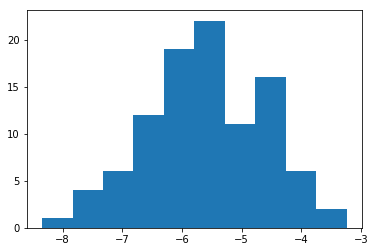

In [23]:
from numpy.random import multivariate_normal
def gen_Psi():
    """ Diagonal matrix describing the covariance between clusters.
    """
    np.random.seed(2018)
    d = 2
    Psi = np.diag(10.0/np.random.sample(d))

    return Psi

def gen_global_mean():
    
    d = 2
    m = np.random.randint(-10.0, 10.0, d).astype(float)
    
    return m

def gen_V_space(Psi):
    # v ~ N(v|0,Psi)

    n_class = 3
    d = Psi.shape[0]
    
    V = multivariate_normal(np.zeros(d),Psi,n_class)
    V = V - V.mean(axis=0)
    
    return V
    
def gen_U_space(V):
     # u ~ N(u|v,1)
    
    n_class = V.shape[0]
    d = V.shape[1]
    
    nk = 100

    U = []
    for k in range(0,n_class):
        
        mk = V[k,:]
        print('mk: {}'.format(mk))
        uk = multivariate_normal(mk,np.diag([1.0 , 1.0]),nk)
        print('uk.mean: {}'.format(uk.mean(axis=0)))
        U.append(uk)
    
    
    U = np.vstack(U)
    return U 


def gen_A(V):
    """ A = [B][inv(Λ ** .5)][Q^T] and assumes same number of data
             in each class v. 
    """
    d = V.shape[1]
    
    np.random.seed(2018)
    B = np.random.randint(-200, 200, (d, d)).astype(float)
    
    print(B)
    
    big_V = np.matmul(V.T, V)  # V is now a scatter matrix.
    
    print('bigV')
    print(big_V)
    
    vals, vecs = np.linalg.eig(big_V)
    
    print('eigen vector values')
    print(vals)
    print(vecs)

    A = B / np.sqrt(vals.real)

    print('partial A')
    print(A)
    A = np.matmul(A, vecs.T)

    return A

Psi = gen_Psi()
Psi

m = gen_global_mean()
m

print('V')

V = gen_V_space(Psi)
V.shape

V

print('U')

U = gen_U_space(V)
U.shape

# should be ckose to zero because of V is zero mran
U.mean(axis=0)

ax = plt.gca()
ax.hist(U[201:300,1])

In [24]:
A = gen_A(V)
A

[[ 50. -98.]
 [ 26.  65.]]
bigV
[[ 3.1717  8.8735]
 [ 8.8735 68.0659]]
eigen vector values
[ 1.9802 69.2574]
[[-0.9911 -0.1331]
 [ 0.1331 -0.9911]]
partial A
[[ 35.5315 -11.7759]
 [ 18.4764   7.8105]]


array([[-33.6484,  16.3996],
       [-19.3515,  -5.2822]])

In [25]:
U_labels = ([1] * 100) + ([2] * 100) + ([3] * 100)
y = np.array(U_labels)

Phi_w = np.matmul(A,A.T)

nk = 100

Sw,Sb = compute_scatter_matrixes(X,y,np.unique(y),nk)


Phi_w

Sw


TypeError: compute_scatter_matrixes() takes 3 positional arguments but 4 were given

In [26]:
A_inv = np.linalg.inv(A)

np.matmul(A_inv,A)

Au =  np.matmul(A, U.T).T

Au.shape

Au.mean(axis=0)
Au.min(axis=0)
Au.max(axis=0)


X = m + Au
X.shape

X.mean(axis=0)
m

(m - X.mean(axis=0))/m

array([[ 1.0000e+00, -2.7756e-17],
       [ 0.0000e+00,  1.0000e+00]])

(300, 2)

array([ 0.0938, -0.5388])

array([-180.957 , -103.2178])

array([163.1598,  69.2848])

(300, 2)

array([-3.9062,  0.4612])

array([-4.,  1.])

array([0.0235, 0.5388])

In [ ]:
# Tranformed centorid os each class (Good for verofocation)
Av =  np.matmul(A, V.T).T
Y = m + Av 
Y.shape

Y

X1 = X[0:100,:]
x_bar = np.mean(X1,axis=0)

# Comparing the true parameter Y_1 with the estimation of this parmeter
Y[0,:]
x_bar

(Y[0,:] - x_bar)/Y[0,:]

In [ ]:
U_labels = ([1] * 100) + ([2] * 100) + ([3] * 100)

ax = plt.gca()
ax.scatter(U[:, 0], U[:, 1], c=U_labels, s=40, cmap='viridis', zorder=2)
ax.scatter(V[:, 0], V[:, 1], c='red', s=40, cmap='viridis', zorder=2)
ax.scatter(0, 0, c='blue', s=40, cmap='viridis', zorder=2)
ax.axis('equal')

In [ ]:
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=U_labels, s=40, cmap='viridis', zorder=2)
ax.scatter(Y[:, 0], Y[:, 1], c='red', s=40, cmap='viridis', zorder=2)
ax.scatter(m[0], m[1], c='blue', s=40, cmap='viridis', zorder=2)
ax.axis('equal')

In [ ]:
y = np.array(U_labels)

plda_m, plda_A, plda_Psi = plda_fit(X, y)

print('A')
A
plda_A

print('Psi')
Psi
plda_Psi

In [ ]:
plda_Phi_w = np.matmul(plda_A,plda_A.T)
plda_Phi_w

X1 = X[0:100,:]
X2 = X[100:200,:]
X3 = X[200:300,:]

print('S1')
S1 = np.cov(X1[:,0],X1[:,1])
S1

print('S2')
S2 = np.cov(X2[:,0],X2[:,1])
S2

print('S3')
S3 = np.cov(X3[:,0],X3[:,1])
S3

print('AVG: (S1 + S2 + S3)/3')
S_avg  = (S1 + S2 + S3)/3

S_avg

(plda_Phi_w - S_avg)/plda_Phi_w

In [ ]:
Phi_w = np.matmul(A,A.T)

plda_Phi_w
Phi_w

(Phi_w - plda_Phi_w)/Phi_w

In [ ]:
# Because the number of class (small sample size)
# The error is big see: 2018-07-19-lhof-study_understand_code_n_unit_test_code

Phi_b =  np.matmul(A,np.matmul(Psi,A.T))
plda_Phi_b = np.matmul(plda_A,np.matmul(plda_Psi,plda_A.T))

Phi_b
plda_Phi_b

(Phi_b - plda_Phi_b)/Phi_b